# Exploring a New Dataset

Before running analysis on a new dataset, one must first explore the data to gain an understanding of what they are working with. This notebook contains an example of doing this with the primary dataset used in this repository, BusinessAnalyst, which was sourced from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.

In [84]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
#importing a dataset into a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")
df.head() #shows the first several rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [86]:
#size of dataset
df.shape

(1470, 35)

This dataset contains 1470 examples and 35 variables, including ID

In [87]:
df.nunique().nsmallest(10)

EmployeeCount        1
Over18               1
StandardHours        1
Attrition            2
Gender               2
OverTime             2
PerformanceRating    2
BusinessTravel       3
Department           3
MaritalStatus        3
dtype: int64

In [88]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)

df.EmployeeNumber.values


array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [77]:
#Check for missing values
missing_df = df.isnull().sum()
print(missing_df)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing values were found

In [89]:
#Check for duplicates
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


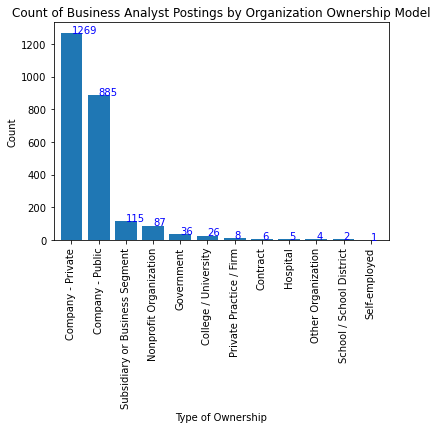

In [34]:
#Exploring how many examples there are of each target variable
df['TypeOfOwnership'].value_counts().plot(kind='bar')

#Add count over the bar
ax=df['TypeOfOwnership'].value_counts().plot.bar(width=.8)
for i, v in df['TypeOfOwnership'].value_counts().reset_index().iterrows():
    ax.text(i, v.TypeOfOwnership - 0.3, v.TypeOfOwnership, color='blue')

plt.xlabel('Type of Ownership')
plt.ylabel('Count')
plt.title('Count of Business Analyst Postings by Organization Ownership Model')
plt.show()

In [ ]:
#Convert text to numbers

False


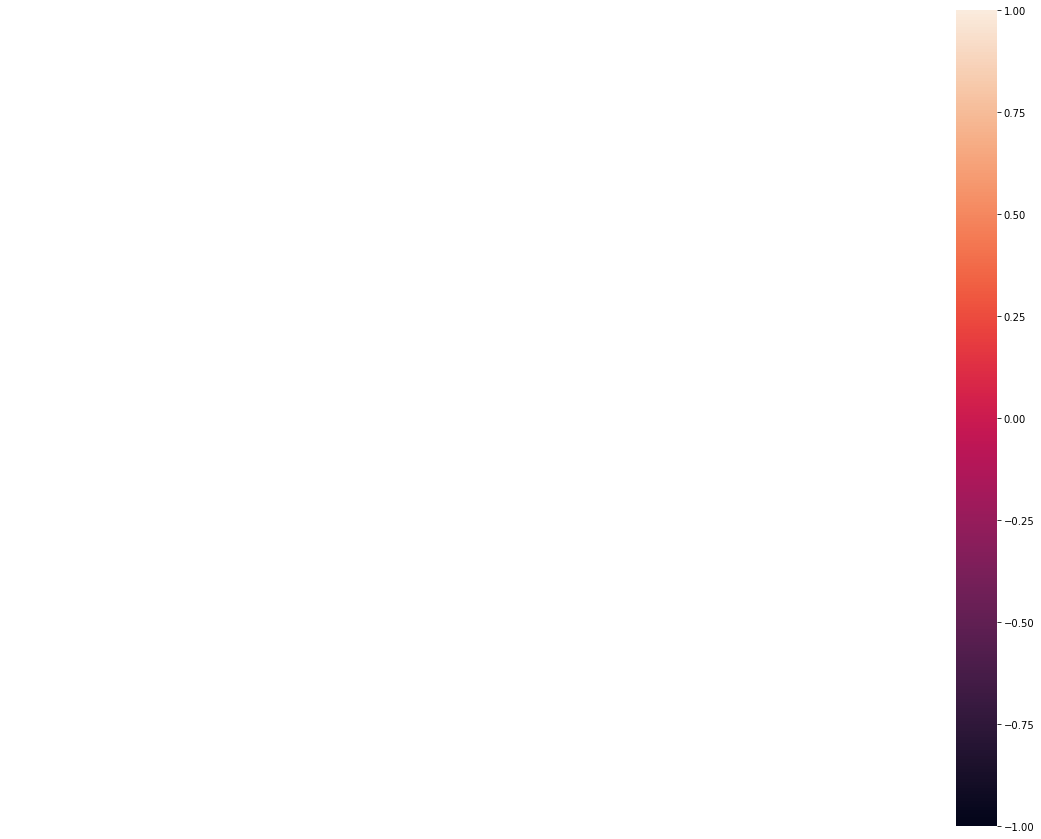

In [74]:
#Pairwise correlation between attributes
corr = df[['Headquarters','Industry','Sector','Revenue']].corr()
print('Headquarters' in corr.index)
plt.subplots(figsize=(20,15))
sns.heatmap(corr, vmin = -1, vmax=1, annot=True)

plt.show()